# **Speech Emotion Recognition using ML**

This project explores Speech Emotion Recognition (SER), which aims to detect and classify human emotions based on audio signals. Understanding emotions from speech is essential for enhancing human-computer interaction, virtual assistants, and mental health monitoring systems. Here, the **TESS** (Toronto Emotional Speech Set) dataset has been used, which consists of speech samples spoken by two female actors portraying seven distinct emotions. Using supervised machine learning techniques, this study extracts acoustic features from the audio files and builds classification models to accurately recognize emotional states from speech.

**Support Vector Machine (SVM)**

In [1]:
# Importing required Python libraries
import os
import numpy as np
import librosa
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import parselmouth


# Writing a function to extract features from an audio file
def extract_features(file_path):
    try:
        audio, sample_rate = sf.read(file_path)
        if len(audio.shape) > 1:
            audio = audio[:, 0]
        audio = audio.astype(float)

        # MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        zcr_mean = np.mean(zcr.T, axis=0)

        # Chroma
        stft = np.abs(librosa.stft(audio))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma.T, axis=0)

        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        contrast_mean = np.mean(contrast.T, axis=0)

        # HNR
        try:
            snd = parselmouth.Sound(file_path)
            hnr = snd.to_harmonicity()
            hnr_values = hnr.values[hnr.values != -200]
            hnr_mean = np.mean(hnr_values) if hnr_values.size > 0 else 0
        except:
            hnr_mean = 0

        # Combine all features
        combined = np.hstack([
            mfccs_mean,
            zcr_mean,
            chroma_mean,
            contrast_mean,
            [hnr_mean]
        ])
        return combined

    except Exception as e:
        print("Error extracting:", file_path, "→", e)
        return None


# Dataset Path
dataset_path = r"C:\Users\muska\Downloads\TESS\TESS Toronto emotional speech set data"
X_features = []
y_labels = []

#  Looping through all actor folders and WAV files
for emotion_label in os.listdir(dataset_path):
    emotion_folder = os.path.join(dataset_path, emotion_label)
    if os.path.isdir(emotion_folder):
        for file_name in os.listdir(emotion_folder):
            if file_name.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file_name)
                features = extract_features(file_path)
                if features is not None:
                    X_features.append(features)
                    y_labels.append(emotion_label)

                    
# Converting the lists to NumPy arrays for model processing 
X_features = np.array(X_features)
y_labels = np.array(y_labels)

#  Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Splitting data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labels, test_size=0.4, random_state=42, stratify=y_labels
)

# Defining hyperparameter grid 
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Using GridSearchCV for finding best parameters
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Printing best parameters
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 99.91%


**Random Forest**

 Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
 Test Accuracy (Random Forest): 100.00%

 Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       320
     disgust       1.00      1.00      1.00       320
        fear       1.00      1.00      1.00       320
       happy       1.00      1.00      1.00       320
     neutral       1.00      1.00      1.00       320
          ps       1.00      1.00      1.00       320
         sad       1.00      1.00      1.00       320

    accuracy                           1.00      2240
   macro avg       1.00      1.00      1.00      2240
weighted avg       1.00      1.00      1.00      2240



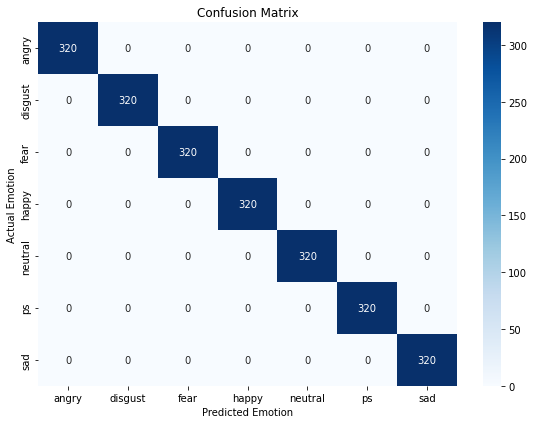

In [2]:
import os
import numpy as np
import librosa
import soundfile as sf
import parselmouth
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Writing Function for feature Extraction
def extract_features(file_path):
    try:
        audio, sample_rate = sf.read(file_path)
        if len(audio.shape) > 1:
            audio = audio[:, 0]
        audio = audio.astype(float)
        
        #MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        #ZCR
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        zcr_mean = np.mean(zcr.T, axis=0)

        #Chroma
        stft = np.abs(librosa.stft(audio))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma.T, axis=0)
        
        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        contrast_mean = np.mean(contrast.T, axis=0)
    
        #HNR
        try:
            snd = parselmouth.Sound(file_path)
            hnr = snd.to_harmonicity()
            hnr_values = hnr.values[hnr.values != -200]
            hnr_mean = np.mean(hnr_values) if hnr_values.size > 0 else 0
        except:
            hnr_mean = 0
    
        #Combining all features together
        return np.hstack([
            mfccs_mean,
            zcr_mean,
            chroma_mean,
            contrast_mean,
            [hnr_mean]
        ])
    except Exception as e:
        print("Error extracting features from:", file_path, "→", e)
        return None

# Loading TESS Dataset
dataset_path = r"C:\Users\muska\Downloads\TESS\TESS Toronto emotional speech set data"
X_features = []
y_labels = []

#  Looping through all actor folders and WAV files
for root, dirs, files in os.walk(dataset_path):
    for file_name in files:
        if file_name.endswith(".wav"):
            file_path = os.path.join(root, file_name)
            features = extract_features(file_path)
            if features is not None:
                X_features.append(features)
                # 🔸 Extract emotion from filename, e.g., 'OAF_back_angry.wav' → 'angry'
                emotion_label = file_name.split('_')[-1].replace('.wav', '').lower()
                y_labels.append(emotion_label)

# Convert to NumPy Arrays
X = np.array(X_features)
y = np.array(y_labels)

# Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Random Forest with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Evaluation
print(" Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f" Test Accuracy (Random Forest): {accuracy * 100:.2f}%")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("Actual Emotion")
plt.tight_layout()
plt.show()


**k-nearest neighbor algorithm**

 Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
 Test Accuracy (KNN + GridSearch): 99.64%

 Classification Report:
                        precision    recall  f1-score   support

              OAF_Fear       1.00      0.99      0.99        80
 OAF_Pleasant_surprise       0.99      0.99      0.99        80
               OAF_Sad       1.00      1.00      1.00        80
             OAF_angry       1.00      1.00      1.00        80
           OAF_disgust       0.99      0.99      0.99        80
             OAF_happy       1.00      1.00      1.00        80
           OAF_neutral       1.00      1.00      1.00        80
             YAF_angry       1.00      1.00      1.00        80
           YAF_disgust       0.98      1.00      0.99        80
              YAF_fear       1.00      1.00      1.00        80
             YAF_happy       1.00      1.00      1.00        80
           YAF_neutral       1.00      1.00      1.00        80
YAF_pleasant_surpr

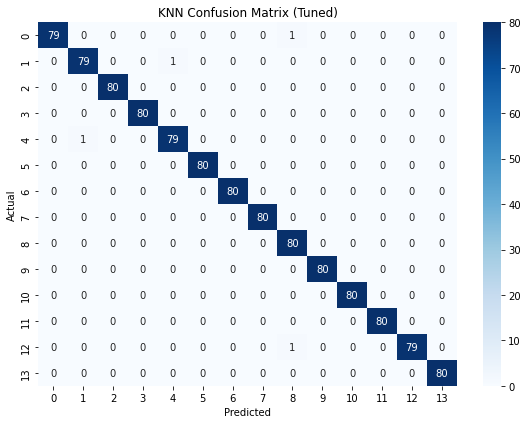

In [4]:
import os
import numpy as np
import librosa
import soundfile as sf
import parselmouth
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Writing Function to Extract Features
def extract_features(file_path):
    try:
        audio, sample_rate = sf.read(file_path)
        if len(audio.shape) > 1:
            audio = audio[:, 0]
        audio = audio.astype(float)

        # MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        zcr_mean = np.mean(zcr.T, axis=0)

        # Chroma
        stft = np.abs(librosa.stft(audio))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma.T, axis=0)

        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        contrast_mean = np.mean(contrast.T, axis=0)

        # HNR (Harmonic-to-Noise Ratio)
        try:
            snd = parselmouth.Sound(file_path)
            hnr = snd.to_harmonicity()
            hnr_values = hnr.values[hnr.values != -200]
            hnr_mean = np.mean(hnr_values) if hnr_values.size > 0 else 0
        except:
            hnr_mean = 0

        # Combining all features
        combined = np.hstack([
            mfccs_mean,
            zcr_mean,
            chroma_mean,
            contrast_mean,
            [hnr_mean]
        ])
        return combined

    except Exception as e:
        print(" Error extracting:", file_path, "→", e)
        return None

#  Loading the Dataset (TESS)
dataset_path = r"C:\Users\muska\Downloads\TESS\TESS Toronto emotional speech set data"
X_features = []
y_labels = []

for emotion_label in os.listdir(dataset_path):
    emotion_folder = os.path.join(dataset_path, emotion_label)
    if os.path.isdir(emotion_folder):
        for file_name in os.listdir(emotion_folder):
            if file_name.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file_name)
                features = extract_features(file_path)
                if features is not None:
                    X_features.append(features)
                    y_labels.append(emotion_label)

# Preprocessing
X = np.array(X_features)
y = np.array(y_labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Grid Search for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)
best_knn = grid.best_estimator_

# Evaluation
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Test Accuracy (KNN + GridSearch): {accuracy * 100:.2f}%\n")

print(" Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


I am applying Ensemble Learning techniques to improve the model's accuracy and robustness. By combining multiple classifiers, the ensemble approach helps in better generalization and performance compared to using a single model.

Ensemble methods help reduce overfitting and boost prediction accuracy by combining the strengths of different models.

 TESS Ensemble Test Accuracy (Hard Voting): 99.91%

 TESS Ensemble Classification Report:
                        precision    recall  f1-score   support

              OAF_Fear       1.00      0.99      0.99        80
 OAF_Pleasant_surprise       1.00      1.00      1.00        80
               OAF_Sad       1.00      1.00      1.00        80
             OAF_angry       1.00      1.00      1.00        80
           OAF_disgust       1.00      1.00      1.00        80
             OAF_happy       1.00      1.00      1.00        80
           OAF_neutral       1.00      1.00      1.00        80
             YAF_angry       0.99      1.00      0.99        80
           YAF_disgust       1.00      1.00      1.00        80
              YAF_fear       1.00      1.00      1.00        80
             YAF_happy       1.00      1.00      1.00        80
           YAF_neutral       1.00      1.00      1.00        80
YAF_pleasant_surprised       1.00      1.00      1.00        80
             

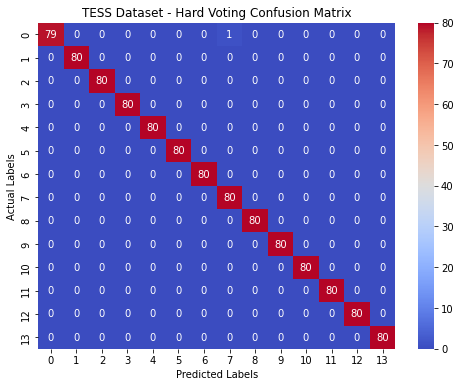

In [5]:
# Required Imports
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Voting Classifier
voting_clf_tess = VotingClassifier(
    estimators=[
        ('svm', best_model),       #  SVM model from TESS
        ('rf', best_rf),           #  Random Forest model from TESS
        ('knn', best_knn)          # KNN model from TESS
    ],
    voting='hard'  # Hard Voting for final decision
)

# Fit the Voting Classifier on TESS training data
voting_clf_tess.fit(X_train, y_train)

#  Predictions on TESS test data
y_pred_tess = voting_clf_tess.predict(X_test)

# Accuracy Score
tess_acc = accuracy_score(y_test, y_pred_tess)
print(f" TESS Ensemble Test Accuracy (Hard Voting): {tess_acc * 100:.2f}%")

# Classification Report
print("\n TESS Ensemble Classification Report:")
print(classification_report(y_test, y_pred_tess))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tess), annot=True, fmt='d', cmap='coolwarm')
plt.title("TESS Dataset - Hard Voting Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()